In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import math
import seaborn as sns
from scipy import signal
from scipy.ndimage import gaussian_filter
from matplotlib.colors import LogNorm, Normalize
from collections import deque
from queue import Queue

In [2]:
partial_plane = plt.imread(r"D:\image_processing_practice\DIP_Java\imagingbook_images_de3\ch06\airfield02g-detail.tif")

90
236


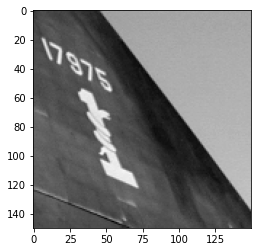

In [3]:
print(np.min(partial_plane))
print(np.max(partial_plane))
plt.imshow(partial_plane, cmap="gray")
plt.show()

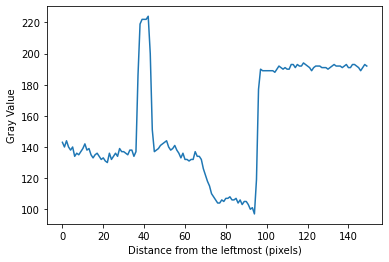

In [4]:
plt.plot(partial_plane[65,...])
plt.xlabel("Distance from the leftmost (pixels)")
plt.ylabel("Gray Value")
plt.show()

In [5]:
laplace_filter = np.array([[0,1,0],[1,-4,1],[0,1,0]])

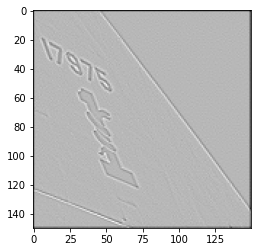

In [6]:
filtered_plane = signal.convolve2d(partial_plane, laplace_filter, mode="same")
plt.imshow(filtered_plane, cmap="gray")
plt.show()

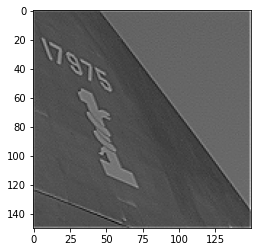

In [7]:
sharpened_plane = partial_plane - filtered_plane # given w=1
plt.imshow(sharpened_plane, cmap="gray")
plt.show()

## Unsharp Masking (USM)

In [8]:
palace = plt.imread(r"D:\image_processing_practice\DIP_Java\imagingbook_images_de3\ch06\ireland02-orig.tif")

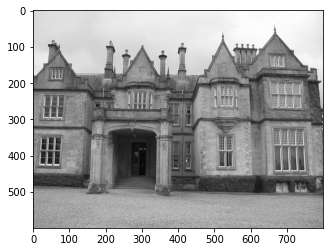

In [9]:
plt.imshow(palace, cmap="gray")
plt.show()

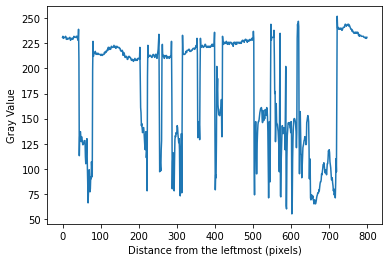

In [10]:
plt.plot(palace[120,...])
plt.xlabel("Distance from the leftmost (pixels)")
plt.ylabel("Gray Value")
plt.show()

In [11]:
def unsharp_masking_result(img, sigma, weight_factor):
    smooth_img = gaussian_filter(img, sigma=sigma)
    mask = palace - smooth_img
    unsharped_img = palace + weight_factor*mask
    return unsharped_img

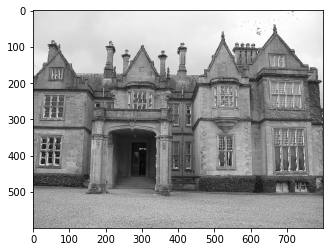

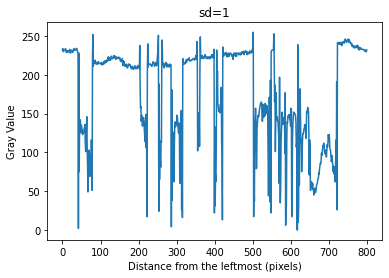

In [12]:
unsharped_palace_0 = unsharp_masking_result(palace, 1, 1)
plt.imshow(unsharped_palace_0, cmap="gray")
plt.show()

plt.plot(unsharped_palace_0[120,...])
plt.xlabel("Distance from the leftmost (pixels)")
plt.ylabel("Gray Value")
plt.title("sd=1")
plt.show()

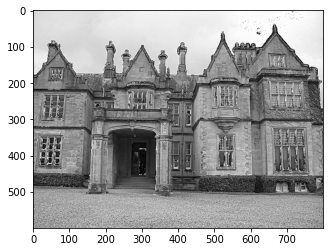

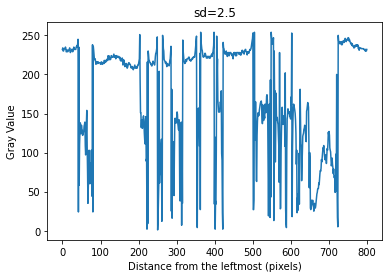

In [13]:
unsharped_palace = unsharp_masking_result(palace, 2.5, 1)
plt.imshow(unsharped_palace, cmap="gray")
plt.show()

plt.plot(unsharped_palace[120,...])
plt.xlabel("Distance from the leftmost (pixels)")
plt.ylabel("Gray Value")
plt.title("sd=2.5")
plt.show()

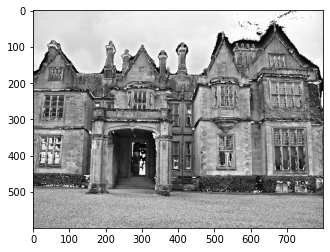

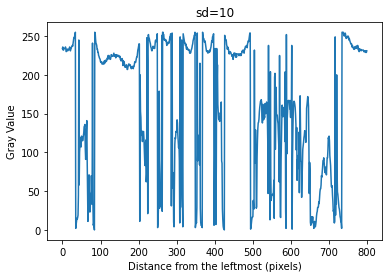

In [14]:
unsharped_palace_2 = unsharp_masking_result(palace, 10, 1)
plt.imshow(unsharped_palace_2, cmap="gray")
plt.show()

plt.plot(unsharped_palace_2[120,...])
plt.xlabel("Distance from the leftmost (pixels)")
plt.ylabel("Gray Value")
plt.title("sd=10")
plt.show()